# CLASS IRIS DATASET

# 1.Business Understanding
## Introduction

* Grouping flowers based on there attributes


# 1.1Problem Statement
* Trying to use attributes of flowers to predict the species of the flower.We are tring to use sepal width and length and petal length and width topredict if a flowers is either species Iris-setosa,Iris-versicolor,Iris-virginica 

# 1.2 Objective
## 1.2.1 Study Objective
* The goal is to predict the species of the flower

## 1.2.2 Specific Objectives


# 2.0 Data Collection
## 2.1 Source of the data
* The data we are working with contains information from Iris Dataset

# 3.1 Data Understanding
### DataFrame


In [163]:
# Importing relevant libraries
# importing libraries

import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz
from category_encoders import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 3.1.2 Datahead

In [67]:
# Displaying the first 10 rows
df = pd.read_csv("C:/Users/HP/Downloads/gomycode/Machine Learning/ project 7/IRIS.csv")
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### 3.1.3 DataShape
* Getting the shape of the dataset: Displaying the number of rows and columns

In [68]:
df.shape
print(f'Our dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Our dataset has 150 rows and 5 columns


### 3.1.4 Data Information
* The information displayed is the number of null rows in every column,the data type of each element in the rows and the names of each column  in the dataset.

In [69]:
df.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


* The dataset comprises 150 entries with no missing values across 5 columns.

In [70]:
df.value_counts('species')

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [72]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Scatterplot to display the species

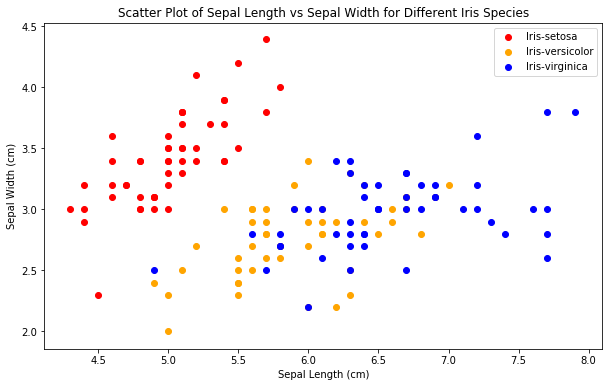

In [75]:
colors = ['red','orange','blue']
species =['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# Plotting
plt.figure(figsize=(10, 6))

for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs Sepal Width for Different Iris Species')
plt.legend()
plt.show()

### 3.1.5 Data Details
* Getting the percentage of missing data in our dataset

In [76]:
# Geting the null values in the data
df.isnull().sum()/df.shape[0]*100


sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

### 3.1.7 Data Description
* Getting the mean , maximum , minimum  and standard deviation from the dataset

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


# 4.0 Data Cleaning
## 4.1 Dropping Duplicates in the data

In [78]:
# Geting the amount of duplicated items in the dataset
df.duplicated().sum()


3

In [79]:
df.drop_duplicates(subset=None, keep='first', inplace=True)


# 5.0 Data Understanding (EDA)

* The main aim of EDA in the dataset is to get an understanding of the Data, Gain insights into the dataset's structure, patterns, and relationships. This involves summarizing the main characteristics of the data, often with visual methods. 

In [80]:
# Making a coy of the dataframe
data = df.copy(deep=True)

In [81]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


### 5.1 Heatmap to display the correlation

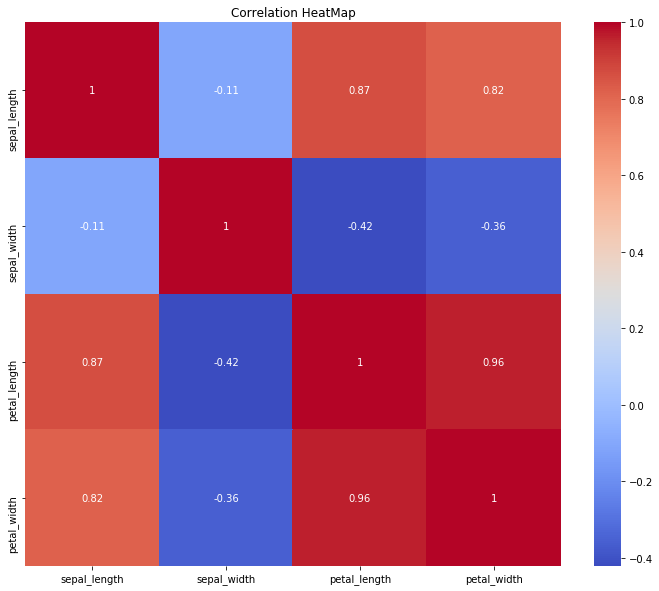

In [82]:
# Plot correlation heatmap with triane shape
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm')
plt.title('Correlation HeatMap')
plt.show()

### 5.2 Identifing and removing Outliers column by column

In [83]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

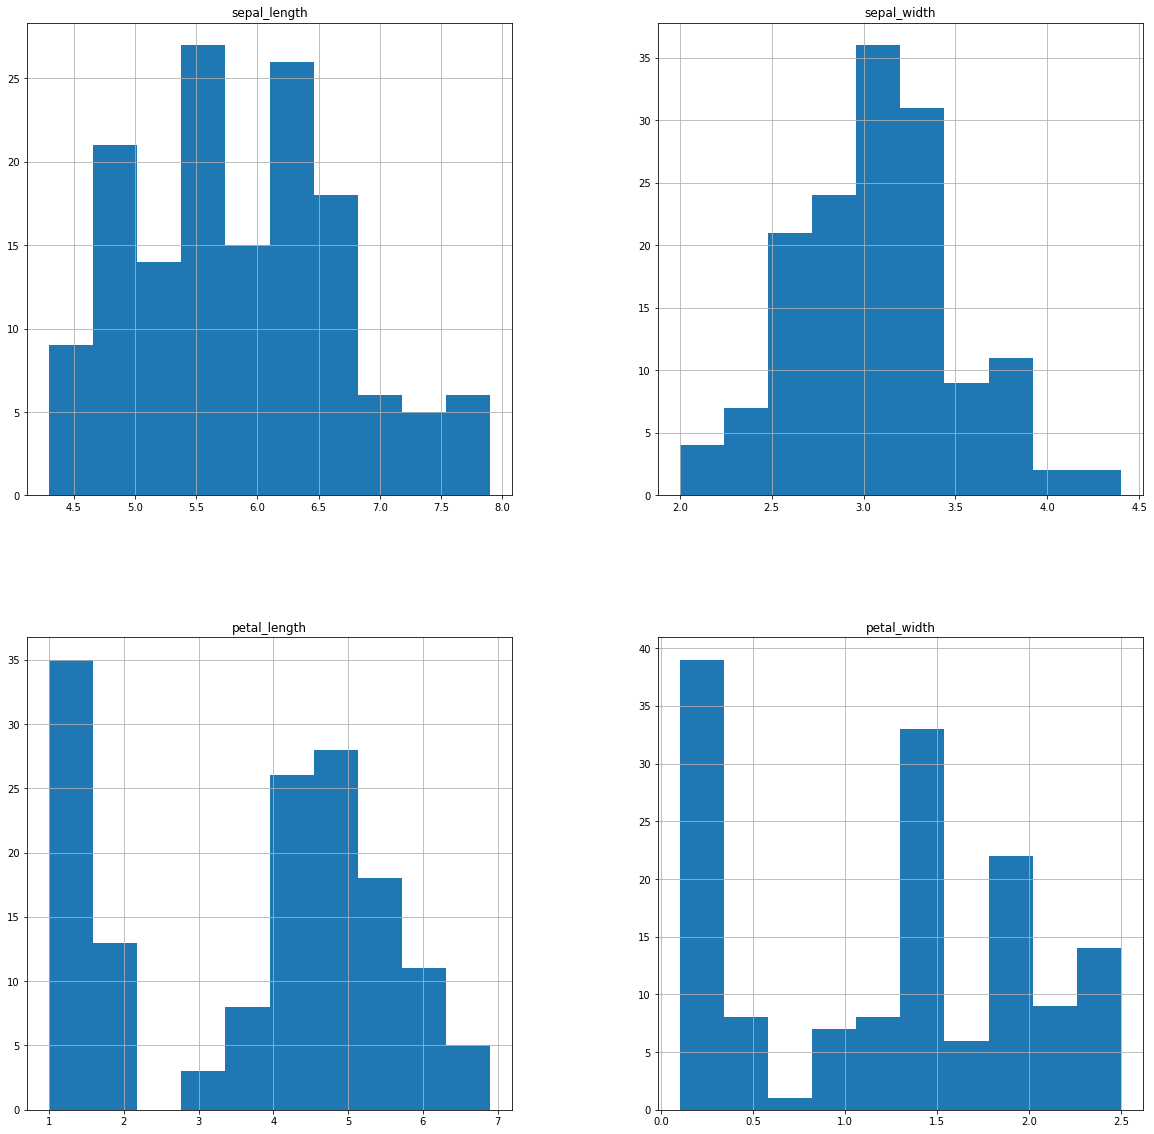

In [84]:

p = df.hist(figsize= (20,20))

### Function to display_boxplots for the columns

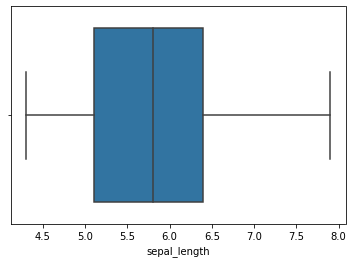

In [85]:

sns.boxplot(df['sepal_length']);


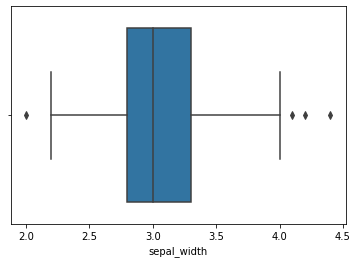

In [86]:
sns.boxplot(df['sepal_width']);

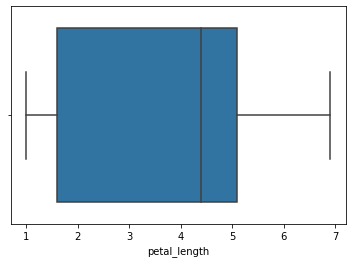

In [87]:
sns.boxplot(df['petal_length']);

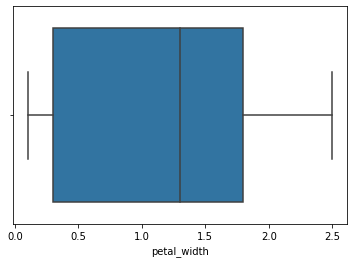

In [88]:
sns.boxplot(df['petal_width']);

## 5.3 Removing Outliers in the dataset

In [89]:
def remove_outliers(df, columns):
    """
    Remove outliers from a DataFrame based on IQR method.

    Parameters:
    - df: DataFrame containing the data
    - columns: List of columns in which to remove outliers

    Returns:
    - DataFrame without outliers in specified columns
    """

    # Create a copy of the original DataFrame to avoid modifying it
    df_clean = df.copy()

    # Iterate over each column
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)

        # Calculate IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Calculate upper and lower bounds to identify outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

In [101]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [102]:
# 5.2 Defining the columns to clean
columns_clean = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [103]:
df_cleaned =remove_outliers(df,columns_clean )
df_cleaned

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [104]:
#Comparing the length of the df_cleaned and the original df
print(f" Original dataframe: {len(df)}") 
print(f" Cleaned dataframe: {len(df_cleaned)}") 

 Original dataframe: 147
 Cleaned dataframe: 143


## 5.4 Displaing columns after removing outliers

In [105]:
def display_boxplots(df, columns_clean):
    """
    Display box plots for specified columns in a DataFrame to identify outliers.

    Parameters:
    - df: DataFrame containing the data
    - columns: List of columns to plot box plots for

    Returns:
    - None
    """
    # Set up the matplotlib figure
    num_cols = len(columns)
    fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(2*num_cols, 5))

    # If only one column is provided, 'axes' is not a list but a single Axes object
    if num_cols == 1:
        axes = [axes]

    # Create box plots for each specified column
    for ax, col in zip(axes, columns):
        sns.boxplot(y=df[col], ax=ax)
        ax.set_title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

## Label Encoder

In [111]:
le = LabelEncoder()
df_cleaned['species'] = le.fit_transform(df_cleaned['species'])
df_cleaned.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# Model Training

## Baseline Model

## 6.1 Defining the X and y

In [113]:
target = 'species'
X = df_cleaned.drop(target,axis=1)
y = df_cleaned[target]

## 6.2 Scaling and fiting and splitting 

In [116]:
# splitting the data set into x test, x train, y test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## Using the Ordinary Least Squares Regression

In [118]:
baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                species   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     440.5
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.70e-77
Time:                        11:32:24   Log-Likelihood:                 14.673
No. Observations:                 143   AIC:                            -19.35
Df Residuals:                     138   BIC:                            -4.533
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2030      0.221      0.920   

## Logistic Model

In [123]:
# Fitting the logistic Regression model
Lo_model = LogisticRegression()


In [124]:
# Fitting the model
Lo_model.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
# Make predictions
y_pred = Lo_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results

print(f"Accuracy: {accuracy}")




Accuracy: 0.9310344827586207


In [127]:

# Creating the model
vanillamodel = LogisticRegression()
vanillamodel.fit(X_train,y_train)


# Print R2 and MSE for training and test sets
# # 3. Predict the target variable for both the training and test data
print(f" Score for Logistic regresion training data {vanillamodel.score(X_train,y_train)}" )
print(f" Score for Logistic regresion testing data {vanillamodel.score(X_test,y_test)}" )

print('*******************************************************')

# # Compute  MSE for the test data
y_train_pred = vanillamodel.predict(X_train)
y_test_pred = vanillamodel.predict(X_test)

# Calculate metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train,y_train_pred)
test_mse = mean_squared_error(y_test,y_test_pred)

# Printing MSE for the train data
print("Training Data Mean Squared Error (MSE): (MSE:", train_mse)

# Printing MSE for the test data
print("Testing Data Mean Squared Error(MSE):", test_mse)

print('*******************************************************')

# Printing mae for train and test data
print("Mean Absolute Error (MAE) - Train:", mae_train)
print("Mean Absolute Error (MAE) - Test:", mae_test)

 Score for Logistic regresion training data 0.9649122807017544
 Score for Logistic regresion testing data 0.9310344827586207
*******************************************************
Training Data Mean Squared Error (MSE): (MSE: 0.03508771929824561
Testing Data Mean Squared Error(MSE): 0.06896551724137931
*******************************************************
Mean Absolute Error (MAE) - Train: 0.03508771929824561
Mean Absolute Error (MAE) - Test: 0.06896551724137931


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## KNN Neighbours

* 1.Apply PCA to the scaled data.
* 2.Build and Fit the KMeans Model.
* 3.Predict the Clusters.
* 4.Plot the Scatter Plot Graph Using the PCA Data.

In [160]:
df_cleaned

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Normalize the data

In [202]:
#initialize scaler
scale = StandardScaler()

#fit the scaled data
scaled_data =scale.fit_transform(df_cleaned)
scaled_data

array([[-0.92610339,  1.16307189, -1.39323729, -1.37089412, -1.2686564 ,
        -1.27095997],
       [-1.16645328, -0.09692266, -1.39323729, -1.37089412, -1.2686564 ,
        -1.27095997],
       [-1.40680316,  0.40707516, -1.45055401, -1.37089412, -1.2686564 ,
        -1.27095997],
       [-1.5269781 ,  0.15507625, -1.33592057, -1.37089412, -1.2686564 ,
        -1.27095997],
       [-1.04627834,  1.4150708 , -1.39323729, -1.37089412, -1.2686564 ,
        -1.27095997],
       [-0.56557857,  2.17106752, -1.22128712, -1.10489974, -1.2686564 ,
        -1.27095997],
       [-1.5269781 ,  0.91107298, -1.39323729, -1.23789693, -1.2686564 ,
        -1.27095997],
       [-1.04627834,  0.91107298, -1.33592057, -1.37089412, -1.2686564 ,
        -1.27095997],
       [-1.76732798, -0.34892157, -1.39323729, -1.37089412, -1.2686564 ,
        -1.27095997],
       [-1.16645328,  0.15507625, -1.33592057, -1.50389132, -1.2686564 ,
        -1.27095997],
       [-0.56557857,  1.66706971, -1.33592057, -1.

   # Introducing PCA

In [203]:
#apply PCA and specify number of components
pca = PCA(n_components = 2)

#fit pca
pca.fit(scaled_data)

#transfom pca
new_df = pca.transform(scaled_data)
new_df

array([[ 2.98189818,  0.58794891],
       [ 2.7790932 , -0.45197129],
       [ 3.02669739, -0.16522544],
       [ 2.96107153, -0.38709737],
       [ 3.09198488,  0.73443855],
       [ 2.8688318 ,  1.54497799],
       [ 3.10803263,  0.20036096],
       [ 2.94370312,  0.35984355],
       [ 2.96697379, -0.86200836],
       [ 2.87383403, -0.27777277],
       [ 2.92633471,  1.10678447],
       [ 3.01559475,  0.27822783],
       [ 2.89050056, -0.51834498],
       [ 3.22109901, -0.75666812],
       [ 2.99125869,  1.83502512],
       [ 2.97855498,  1.52004428],
       [ 2.92015204,  0.61039803],
       [ 2.72116882,  1.46388837],
       [ 3.07399769,  1.18787409],
       [ 2.69019668,  0.54800869],
       [ 2.95182607,  1.019909  ],
       [ 3.40035291,  0.53380655],
       [ 2.59351641,  0.29316812],
       [ 2.93330237,  0.29692811],
       [ 2.6745704 , -0.39557987],
       [ 2.79278004,  0.41097522],
       [ 2.90480618,  0.63810691],
       [ 2.87181149,  0.44145927],
       [ 2.944405  ,

* PCA takes the the n_components with the hight amount of variance

In [204]:
# the two highest component variance in the data
pca.explained_variance_ratio_

array([0.70835291, 0.18825517])

# Baseline Model

In [223]:
#build the model
km = KMeans(n_clusters=3)

#fit and predict the dataframe
y_pred = km.fit_predict(new_df)

# view the df
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Adding the pca data to a df

In [225]:
# Add the cluster labels to the PCA-transformed DataFrame
pca_df = pd.DataFrame(new_df, columns=['PC1', 'PC2'])
pca_df['cluster'] = y_pred
pca_df

,PC1,PC2,cluster
0,2.981898,0.587949,1
1,2.779093,-0.451971,1
2,3.026697,-0.165225,1
3,2.961072,-0.387097,1
4,3.091985,0.734439,1
...,...,...,...
138,-2.003933,0.811499,2
139,-1.805569,-0.418534,2
140,-1.719372,0.656302,2
141,-1.568787,1.366000,2


## Plotting the scaterplot

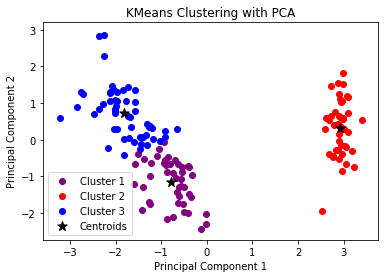

In [227]:
# Create subsets of the DataFrame based on cluster labels
df1 = pca_df[pca_df['cluster'] == 0]
df2 = pca_df[pca_df['cluster'] == 1]
df3 = pca_df[pca_df['cluster'] == 2]

# Plot the clusters
plt.scatter(df1['PC1'], df1['PC2'], color='purple', label='Cluster 1')
plt.scatter(df2['PC1'], df2['PC2'], color='red', label='Cluster 2')
plt.scatter(df3['PC1'], df3['PC2'], color='blue', label='Cluster 3')

# Plot the centroids
centroids = km.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, color='black', marker='*', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with PCA')
plt.legend()
plt.show()

##  Silhoutte Score

In [220]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(new_df,y_pred)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.48849579868779724


* Measure of similarity in between the clusters

## Defing the Kmeans Model

In [179]:
# Finding the optimam K value :Within cluster Sum of Squares

wcss = []
for k in range(1,13):
    k_means = KMeans(n_clusters=k)
    k_means.fit(df_cleaned)
    wcss.append(k_means.inertia_)

## Plotting the Elbow curve

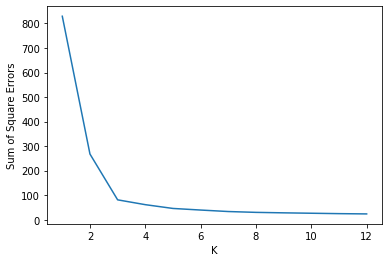

In [180]:
plt.xlabel('K')
plt.ylabel('Sum of Square Errors')
plt.plot(range(1,13),wcss)

* Optimum K value = 3

In [181]:
km = KMeans(n_clusters=3)

y_pred = km.fit_predict(df_cleaned)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Scale the data

In [194]:
scaler = MinMaxScaler()
df_cleaned[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(df_cleaned[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

## Visualizing the Values

In [195]:
df_cleaned['cluster']= y_pred
df_cleaned

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,0.222222,0.722222,0.067797,0.041667,0,1
1,0.166667,0.444444,0.067797,0.041667,0,1
2,0.111111,0.555556,0.050847,0.041667,0,1
3,0.083333,0.500000,0.084746,0.041667,0,1
4,0.194444,0.777778,0.067797,0.041667,0,1
...,...,...,...,...,...,...
145,0.666667,0.444444,0.711864,0.916667,2,0
146,0.555556,0.166667,0.677966,0.750000,2,0
147,0.611111,0.444444,0.711864,0.791667,2,0
148,0.527778,0.666667,0.745763,0.916667,2,0


In [196]:
k_means.cluster_centers_

array([[ 6.63958333e+00,  2.98958333e+00,  5.58333333e+00,
         2.03541667e+00,  2.00000000e+00,  1.00000000e+00],
       [ 4.98000000e+00,  3.37777778e+00,  1.46222222e+00,
         2.51111111e-01,  6.66133815e-16,  2.00000000e+00],
       [ 5.93400000e+00,  2.78000000e+00,  4.28000000e+00,
         1.34000000e+00,  1.02000000e+00, -1.22124533e-15]])

In [222]:
# Perform KMeans clustering
k_means = KMeans(n_clusters=3)
clusters = k_means.fit_predict(new_df)

# Add the cluster labels to the DataFrame
df_cleaned['cluster'] = clusters
df_cleaned

# # Create subsets of the DataFrame based on cluster labels
# df1 = df_cleaned[df_cleaned['cluster'] == 0]
# df2 = df_cleaned[df_cleaned['cluster'] == 1]
# df3 = df_cleaned[df_cleaned['cluster'] == 2]

# # Plot the clusters
# plt.scatter(df1['sepal_length'], df1['sepal_width'], color='purple', label='Cluster 1')
# plt.scatter(df2['sepal_length'], df2['sepal_width'], color='red', label='Cluster 2')
# plt.scatter(df3['sepal_length'], df3['sepal_width'], color='blue', label='Cluster 3')

# centroids = k_means.cluster_centers_
# plt.scatter(centroids[:, 0], centroids[:, 1], s=100, color='black', marker='', label='Centroids')

# plt.xlabel('sepal_length')
# plt.ylabel('Sepal Width')
# plt.title('KMeans Clustering of Iris Dataset')
# plt.legend()
# plt.show()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,0.222222,0.722222,0.067797,0.041667,0,1
1,0.166667,0.444444,0.067797,0.041667,0,1
2,0.111111,0.555556,0.050847,0.041667,0,1
3,0.083333,0.500000,0.084746,0.041667,0,1
4,0.194444,0.777778,0.067797,0.041667,0,1
...,...,...,...,...,...,...
145,0.666667,0.444444,0.711864,0.916667,2,2
146,0.555556,0.166667,0.677966,0.750000,2,2
147,0.611111,0.444444,0.711864,0.791667,2,2
148,0.527778,0.666667,0.745763,0.916667,2,2


In [154]:
from sklearn.cluster import KMeans

# Set number of clusters at initialization time
k_means = KMeans(n_clusters=3) 

# Run the clustering algorithm
k_means.fit(df_cleaned) 

# Generate cluster index values for each row
cluster_assignments = k_means.predict(df_cleaned)
cluster_assignments

# Cluster predictions for each point are also stored in k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

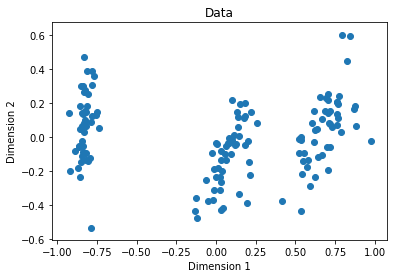

In [156]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()